# Task 4 — Sentiment Analysis & Visualization

## Task Objective

**You need to:**

👉 Analyze text data (social media posts/tweets)

👉 Identify sentiment (Positive / Negative / Neutral)

👉 Visualize sentiment patterns

👉 Understand public opinion trends 

**Step 1: Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob


**Step 2: Load Dataset**

In [2]:
df = pd.read_csv(r"C:\Users\admin\Documents\Prodigy Infotech\Prodigy_DS_04\Datasets\Tweets\Tweets.csv")

df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Step 3: Understand Data**

**Dataset Info**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

**Check Missing Values**

In [5]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

**Step 4.1: Drop unnecessary columns**

In [6]:
df = df.drop(columns=[
    'negativereason', 
    'negativereason_confidence', 
    'airline_sentiment_gold',
    'negativereason_gold', 
    'tweet_coord', 
    'tweet_location', 
    'user_timezone'
])


**Step 4.2: Confirm missing values**

In [7]:
df.isnull().sum()


tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
dtype: int64

**Step 5: Select Text Column**

In [9]:
df[['text', 'airline_sentiment']].head()


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


**Step 6: Sentiment Visualization**

**Count sentiment distribution**

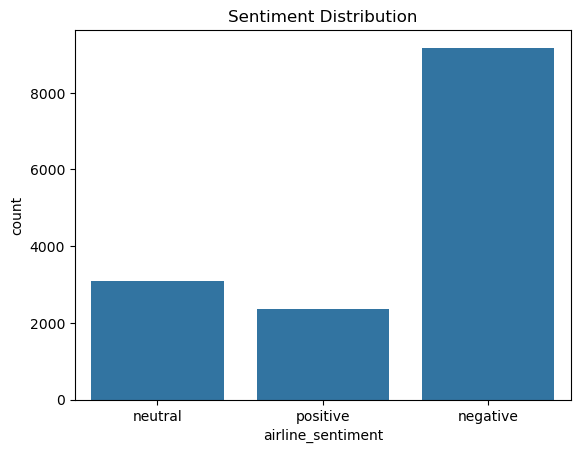

In [10]:
sns.countplot(x='airline_sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


**Step 7: Sentiment by Airline**

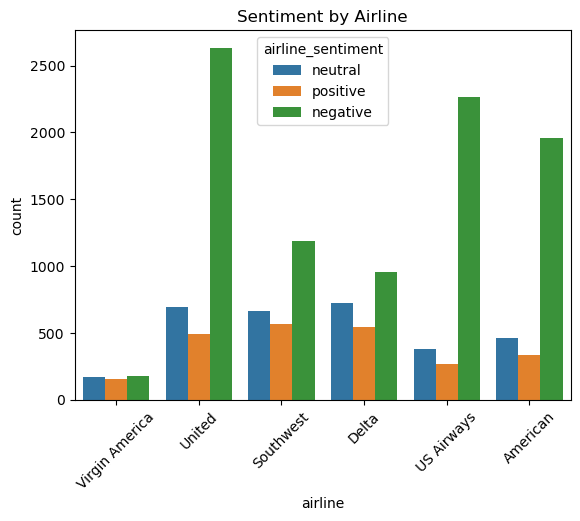

In [12]:
sns.countplot(x='airline', hue='airline_sentiment', data=df)
plt.xticks(rotation=45)
plt.title("Sentiment by Airline")
plt.show()


**Step 8: Text Length Analysis**

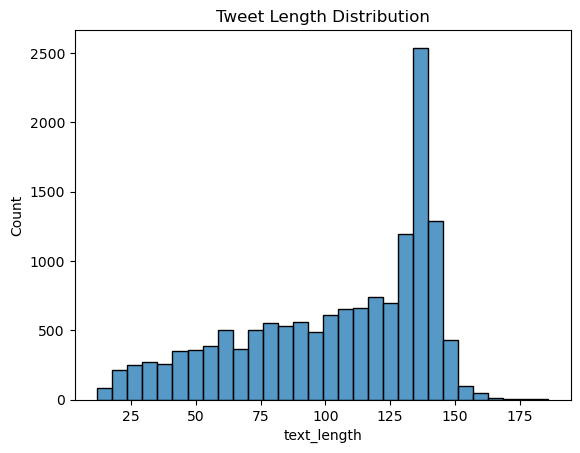

In [13]:
df['text_length'] = df['text'].apply(len)

sns.histplot(df['text_length'], bins=30)
plt.title("Tweet Length Distribution")
plt.show()


**Step 9: Polarity Analysis using TextBlob**


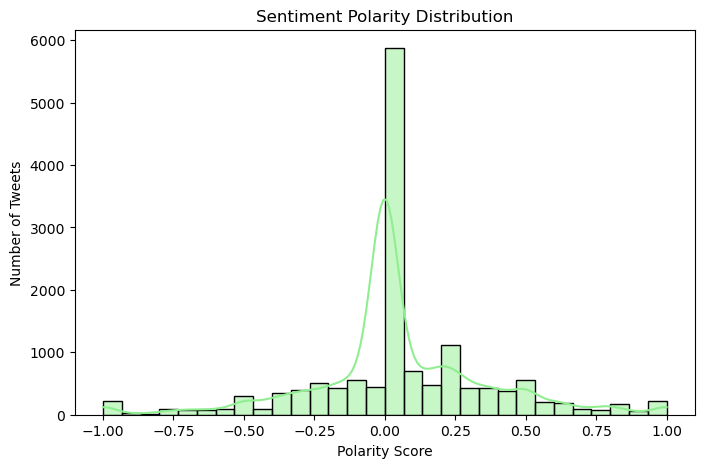

In [14]:
# Polarity: -1 (negative) to 1 (positive)
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(8,5))
sns.histplot(df['polarity'], bins=30, kde=True, color='lightgreen')
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity Score")
plt.ylabel("Number of Tweets")
plt.show()


# INSIGHTS

In [15]:
print("✅ Task 4 Insights:\n")

# Total tweets
print(f"Total Tweets analyzed: {len(df)}")

# Sentiment counts
print("\nTweet Sentiment Counts:")
print(df['airline_sentiment'].value_counts())

# Average polarity
print(f"\nAverage Tweet Polarity: {df['polarity'].mean():.2f}")

# Airline with most negative tweets
negative_counts = df[df['airline_sentiment']=='negative']['airline'].value_counts()
print(f"\nAirline with most negative tweets: {negative_counts.idxmax()} ({negative_counts.max()} tweets)")


✅ Task 4 Insights:

Total Tweets analyzed: 14640

Tweet Sentiment Counts:
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

Average Tweet Polarity: 0.05

Airline with most negative tweets: United (2633 tweets)


📊 **Sentiment Analysis of Tweets**

•A total of 14,640 tweets were analyzed to understand public sentiment towards airlines.

•The analysis classified tweets as positive, negative, or neutral to capture overall public opinion.

•This provides insights into customer perceptions and attitudes towards different airlines.

📈 **Sentiment Distribution**

•Negative tweets: 9,178 (majority of posts)

•Neutral tweets: 3,099

•Positive tweets: 2,363

•The average tweet polarity was 0.05, indicating slightly positive sentiment overall, despite the higher volume of negative tweets.

🔎 **Patterns Observed**

•Negative sentiment dominated across the dataset, highlighting areas of dissatisfaction among airline customers.

•United Airlines received the most negative tweets (2,633), suggesting higher criticism compared to other airlines.

•While some tweets expressed neutral or positive sentiment, patterns indicate that negative experiences were more frequently shared.

💼 **Business Insights**

•Airlines can use sentiment analysis to monitor customer satisfaction in real time.

•Identifying negative sentiment patterns helps prioritize service improvements and customer engagement strategies.

•Data-driven insights from social media can inform marketing and reputation management decisions.

📈 **Sentiment Distribution Visualization**

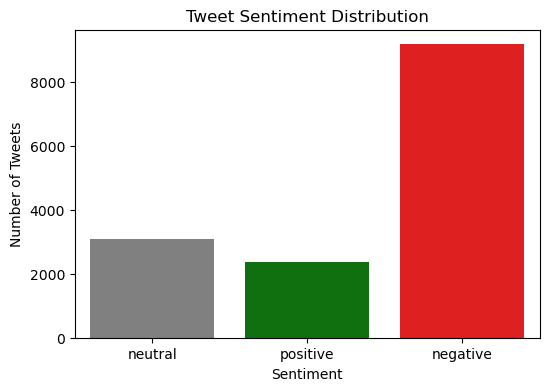

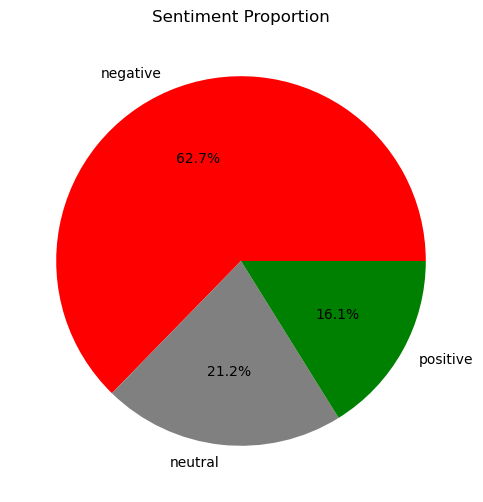

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution bar chart
plt.figure(figsize=(6,4))
sns.countplot(x='airline_sentiment', data=df, hue='airline_sentiment', dodge=False, palette={'negative':'red', 'neutral':'gray', 'positive':'green'}, legend=False)
plt.title('Tweet Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


# Pie chart for sentiment distribution
sentiment_counts = df['airline_sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['red', 'gray', 'green'])
plt.title('Sentiment Proportion')
plt.show()
